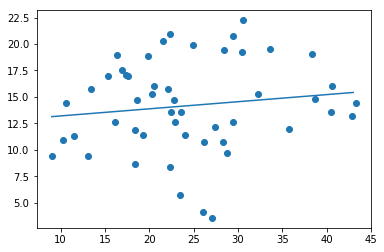

In [207]:
import numpy as np
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/18683821/generating-random-correlated-x-and-y-points-using-numpy
def generate_points(n):
  xx = np.array([0, 50.0])
  yy = np.array([0.3, 30.0])
  means = [xx.mean(), yy.mean()]
  stds = [xx.std() / 3, yy.std() / 3]
  corr = np.random.uniform(-1,1)
  covs = [[stds[0]**2, stds[0]*stds[1]*corr],
          [stds[0]*stds[1]*corr, stds[1]**2]]

  m = np.random.multivariate_normal(means, covs, n).T
  plt.scatter(m[0], m[1])
  return m

def calculate_sxx(pts):
    xsqsum = np.sum(pts[0]**2)
    xsumsq = np.sum(pts[0])**2
    return (xsqsum - (xsumsq/pts.shape[1]))
    
def calculate_sxy(pts):
    xysum = np.sum(pts[0]*pts[1])
    sumx = np.sum(pts[0])
    sumy = np.sum(pts[1])
    return (xysum) - ((sumx*sumy)/pts.shape[1])
    
def ls_regression(pts):
    sxx = float(calculate_sxx(pts))
    sxy = float(calculate_sxy(pts))
    xbar = np.mean(pts[0])
    ybar = np.mean(pts[1])
    
    b = sxy/sxx
    a = ybar - b*xbar
    
    graph(a, b, 'a+(b*x)', range(int(min(np.floor(pts[0]))), int(max(np.ceil(pts[0])))))

# https://stackoverflow.com/questions/14000595/graphing-an-equation-with-matplotlib
def graph(a, b, formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.plot(x,y)
    plt.show()
    
pts = generate_points(50)
ls_regression(pts)